In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

## Supervised
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

from sklearn.linear_model import LogisticRegression
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb



## Unsupervised
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Semi-Supervised
from sklearn.semi_supervised import LabelSpreading


## Deep Learning
# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
# PyTorch
import torch
import torch.nn as nn

# Stardardization and Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Evaluating Models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
df_interest = pd.read_csv('data/data_set.csv')
df_interest.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.0,36.0
1,12.12,715-719,19200.0,19200.0,36.0
2,21.98,690-694,35000.0,35000.0,60.0
3,9.99,695-699,10000.0,9975.0,36.0
4,11.71,695-699,12000.0,12000.0,36.0


In [4]:
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [5]:
df_interest.describe()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length
count,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012
std,4.178007,7801.222483,7743.387861,9.933753
min,5.420000,1000.000000,-0.010000,36.000000
25%,10.160000,6000.000000,6000.000000,36.000000
50%,13.110000,10000.000000,10000.000000,36.000000
75%,15.800000,17000.000000,16000.000000,36.000000
max,24.890000,35000.000000,35000.000000,60.000000


In [6]:
df_interest['fico_range'].unique()

array(['735-739', '715-719', '690-694', '695-699', '670-674', '720-724',
       '705-709', '685-689', '665-669', '725-729', '730-734', '740-744',
       '760-764', '675-679', '765-769', '780-784', '830-834', '660-664',
       '710-714', '785-789', '750-754', '700-704', '680-684', '755-759',
       '790-794', '810-814', '775-779', '815-819', '745-749', '805-809',
       '800-804', '655-659', '770-774', '795-799', '640-644', '645-649',
       '820-824', '650-654'], dtype=object)

In [16]:
df_interest[['fico_low', 'fico_high']] = df_interest['fico_range'].str.split('-', expand=True).astype(int)

df_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
 5   fico_low                    2498 non-null   int32  
 6   fico_high                   2498 non-null   int32  
dtypes: float64(4), int32(2), object(1)
memory usage: 117.2+ KB


In [17]:
df_clean_interest = df_interest.drop('fico_range', axis=1)

df_clean_interest


,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high
0,8.90,20000.0,20000.00,36.0,735,739
1,12.12,19200.0,19200.00,36.0,715,719
2,21.98,35000.0,35000.00,60.0,690,694
3,9.99,10000.0,9975.00,36.0,695,699
4,11.71,12000.0,12000.00,36.0,695,699
...,...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,705,709
2494,14.09,16000.0,16000.00,60.0,740,744
2495,13.99,10000.0,10000.00,36.0,680,684
2496,12.42,6000.0,6000.00,36.0,675,679


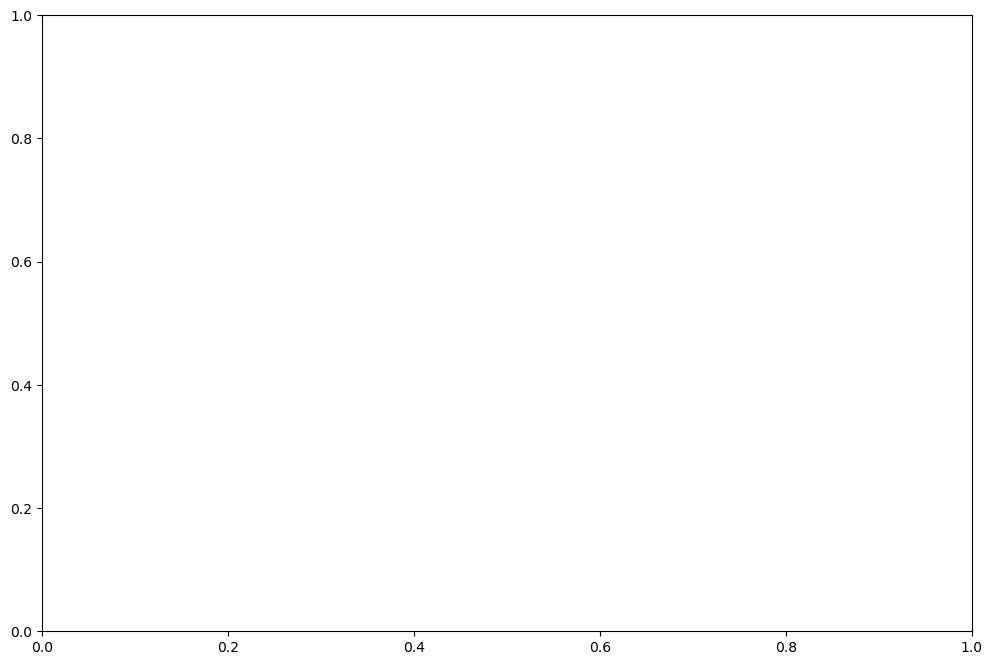

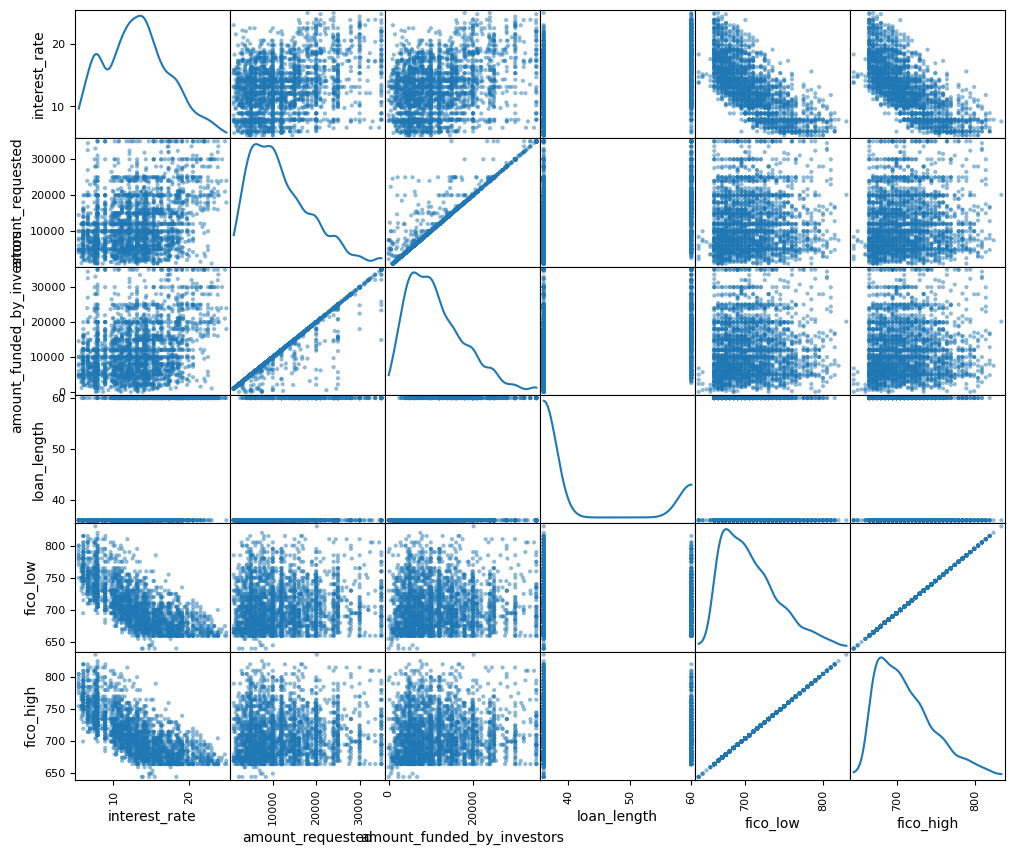

In [20]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,8));
scatter_matrix(df_clean_interest, diagonal='kde', figsize=(12,10));



In [21]:
df_clean_interest.describe()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012,705.858687,709.858687
std,4.178007,7801.222483,7743.387861,9.933753,34.994039,34.994039
min,5.420000,1000.000000,-0.010000,36.000000,640.000000,644.000000
25%,10.160000,6000.000000,6000.000000,36.000000,680.000000,684.000000
50%,13.110000,10000.000000,10000.000000,36.000000,700.000000,704.000000
75%,15.800000,17000.000000,16000.000000,36.000000,725.000000,729.000000
max,24.890000,35000.000000,35000.000000,60.000000,830.000000,834.000000
